# Problem Statement

based on the trends in mobile phone purchases changes in popular features.I would like to analyze customer reviews on different mobile phone models
To detrmine which features are most important to the consumers while choosing a mobile phone and to examine which mobile phone brands are popular and 
mostly uisng although there are many different brands i want to give a clear suggestion to bought a mobile based on their budget and reviews we can 
easily predict the features what the consumers are expecting.

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

# Scrapping the data from Website

In [196]:

url='https://www.flipkart.com/search?q=mobiles+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1'
#print(url)

requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
headers = {"Accept-Language": "en-US,en;q=0.9"}
r=requests.get(url, headers=headers)
print(r)

Names=[]
Prices=[]
Description=[]
Reviews=[]

soup=BeautifulSoup(r.text,'lxml')
#print(soup)
box=soup.find('div',class_='_1YokD2 _3Mn1Gg')
names=box.find_all('div',class_='_4rR01T')
#print(names)

for i in names:
    n=i.text
    Names.append(n)
print(len(Names))

prices=box.find_all('div',class_='_30jeq3 _1_WHN1')
for i in prices:
    n=i.text
    Prices.append(n)
print(len(Prices))

description=box.find_all('div',class_='fMghEO')
for i in description:
    n=i.text
    Description.append(n)
print(len(Description))

reviews=box.find_all('div',class_='_3LWZlK')
for i in reviews:
    n=i.text
    Reviews.append(n)
print(len(Reviews))


<Response [500]>

<Response [200]>
24
24
24
24


In [221]:
url='https://www.flipkart.com/search?q=mobiles+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1'
#print(url)

requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})
headers = {"Accept-Language": "en-US,en;q=0.9"}
r=requests.get(url, headers=headers)
print(r)

Names=[]
Prices=[]
Description=[]
Reviews=[]
for i in range(1,23):
    soup=BeautifulSoup(r.text,'lxml')
    #print(soup)
    box=soup.find('div',class_='_1YokD2 _3Mn1Gg')
    names=box.find_all('div',class_='_4rR01T')
    #print(names)
    
    for i in names:
        n=i.text
        Names.append(n)
    print(len(Names))
    
    prices=box.find_all('div',class_='_30jeq3 _1_WHN1')
    for i in prices:
        n=i.text
        Prices.append(n)
    print(len(Prices))
    
    description=box.find_all('div',class_='fMghEO')
    for i in description:
        n=i.text
        Description.append(n)
    print(len(Description))
    
    reviews=box.find_all('div',class_='_3LWZlK')
    for i in reviews:
        n=i.text
        Reviews.append(n)
    print(len(Reviews))


<Response [500]>

<Response [200]>
24
24
24
24
48
48
48
48
72
72
72
72
96
96
96
96
120
120
120
120
144
144
144
144
168
168
168
168
192
192
192
192
216
216
216
216
240
240
240
240
264
264
264
264
288
288
288
288
312
312
312
312
336
336
336
336
360
360
360
360
384
384
384
384
408
408
408
408
432
432
432
432
456
456
456
456
480
480
480
480
504
504
504
504
528
528
528
528


# Creating a DataFrame

In [4]:
df=pd.DataFrame({'ProductName':Names,'ProductPrices':Prices,'ProductFeatures':Description,'ProductReviews':Reviews})
print(df)

                                           ProductName ProductPrices  \
0        REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)       ₹31,999   
1         REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)       ₹31,999   
2                 OnePlus 11R 5G (Sonic Black, 256 GB)       ₹36,096   
3                      OnePlus 12R (Iron Grey, 256 GB)       ₹44,321   
4                      OnePlus 12R (Cool Blue, 256 GB)       ₹44,080   
..                                                 ...           ...   
523                    Apple iPhone 11 (White, 128 GB)       ₹48,900   
524  SAMSUNG Galaxy Z Flip3 5G (Phantom Black, 128 GB)       ₹45,999   
525                Apple iPhone 6 Plus (Silver, 64 GB)       ₹48,999   
526              OnePlus 11 5G (Eternal Green, 128 GB)       ₹56,999   
527                OnePlus 11 5G (Titan Black, 128 GB)       ₹49,999   

                                       ProductFeatures ProductReviews  
0    8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...         

In [5]:
df.to_csv('mobile.csv')

In [35]:
df=pd.read_csv('mobile.csv')

In [36]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductFeatures,ProductReviews
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)","₹31,999",8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)","₹31,999",8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2


# Exploratory Data Analysis and Data Cleaning

In [37]:
df['ProductPrices']=df['ProductPrices'].apply(lambda x:x.replace('₹','').replace(',','')).astype(float)

In [38]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductFeatures,ProductReviews
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2


In [39]:
re.findall(r'\b8\b',df.ProductFeatures[0])

['8']

In [40]:
df['RAM']=df['ProductFeatures'].apply(lambda x:' '.join(re.findall(r'\b8\b',x)))

In [41]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductFeatures,ProductReviews,RAM
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8


In [42]:
re.findall(r'\b256\b',df.ProductFeatures[0])

['256']

In [43]:
df['ROM']=df['ProductFeatures'].apply(lambda x:' '.join(re.findall(r'\b256\b',x)))

In [44]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductFeatures,ProductReviews,RAM,ROM
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256


In [45]:
re.findall('\(([\w\s]+),',df.ProductName[0])

['Fusion Purple']

In [46]:
df['MobileColour']=df['ProductName'].apply(lambda x:' '.join(re.findall('\(([\w\s]+)',x)))

In [47]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductFeatures,ProductReviews,RAM,ROM,MobileColour
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256,Fusion Purple
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256,Fusion White


In [48]:
re.findall('^[A-Z]\w+',df.ProductName[0])

['REDMI']

In [49]:
df['BrandName']=df['ProductName'].apply(lambda x:' '.join(re.findall('^[A-Z]\w+',x)))

In [50]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductFeatures,ProductReviews,RAM,ROM,MobileColour,BrandName
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256,Fusion Purple,REDMI
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256,Fusion White,REDMI


In [51]:
re.findall('\((\d+\.\d+)\s*inch\)\s',df.ProductFeatures[0])

['6.67']

In [52]:
df['Displayinch'] = df['ProductFeatures'].apply(lambda x: ' '.join(re.findall(r"\((\d+\.\d+)\s*inch\)\s", x)))

In [53]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductFeatures,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256,Fusion Purple,REDMI,6.67
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256,Fusion White,REDMI,6.67


In [54]:
re.findall(r'(\d+)MP',df.ProductFeatures[0])

['200', '8', '2', '16']

In [55]:
df['Camera'] = df['ProductFeatures'].apply(lambda x: ' '.join(re.findall(r'(\d+)MP', x)))

In [56]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductFeatures,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256,Fusion Purple,REDMI,6.67,200 8 2 16
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,8 GB RAM | 256 GB ROM16.94 cm (6.67 inch) Disp...,4.2,8,256,Fusion White,REDMI,6.67,200 8 2 16


In [57]:
df.drop('ProductFeatures',axis=1,inplace=True)

In [58]:
df.head(2)

,Unnamed: 0,ProductName,ProductPrices,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
0,0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,4.2,8,256,Fusion Purple,REDMI,6.67,200 8 2 16
1,1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,4.2,8,256,Fusion White,REDMI,6.67,200 8 2 16


In [59]:
df.columns

Index(['Unnamed: 0', 'ProductName', 'ProductPrices', 'ProductReviews', 'RAM',
       'ROM', 'MobileColour', 'BrandName', 'Displayinch', 'Camera'],
      dtype='object')

In [60]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [61]:
df.head(2)

,ProductName,ProductPrices,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
0,"REDMI Note 13 Pro+ 5G (Fusion Purple, 256 GB)",31999.0,4.2,8,256,Fusion Purple,REDMI,6.67,200 8 2 16
1,"REDMI Note 13 Pro+ 5G (Fusion White, 256 GB)",31999.0,4.2,8,256,Fusion White,REDMI,6.67,200 8 2 16


In [62]:
df.drop('ProductName',axis=1,inplace=True)

In [30]:
df.head(2)

,ProductPrices,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
0,31999.0,4.2,8,256,Fusion Purple,REDMI,6.67,200 8 2 16
1,31999.0,4.2,8,256,Fusion White,REDMI,6.67,200 8 2 16


# Create a New Data Frame

In [63]:
df.to_csv('Mobiledata.csv')

In [2]:
df=pd.read_csv('Mobiledata.csv')

In [3]:
df.head(2)

,Unnamed: 0,ProductPrices,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
0,0,31999.0,4.2,8.0,256.0,Fusion Purple,REDMI,6.67,200 8 2 16
1,1,31999.0,4.2,8.0,256.0,Fusion White,REDMI,6.67,200 8 2 16


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head(2)

,ProductPrices,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
0,31999.0,4.2,8.0,256.0,Fusion Purple,REDMI,6.67,200 8 2 16
1,31999.0,4.2,8.0,256.0,Fusion White,REDMI,6.67,200 8 2 16


In [7]:
df.describe()

,ProductPrices,ProductReviews,RAM,ROM,Displayinch
count,528.000000,528.000000,264.0,176.0,528.00000
mean,45545.000000,4.395833,8.0,256.0,6.48875
std,6435.476511,0.145852,0.0,0.0,0.31832
min,31999.000000,4.100000,8.0,256.0,5.50000
25%,44260.750000,4.300000,8.0,256.0,6.30000
50%,46999.000000,4.400000,8.0,256.0,6.67000
75%,48924.750000,4.500000,8.0,256.0,6.70000
max,56999.000000,4.600000,8.0,256.0,6.78000


In [14]:
df.shape

(528, 8)

In [11]:
df.isnull().sum()

ProductPrices       0
ProductReviews      0
RAM               264
ROM               352
MobileColour        0
BrandName          44
Displayinch         0
Camera              0
dtype: int64

In [10]:
df.sum()

ProductPrices                                            24047760.0
ProductReviews                                               2321.0
RAM                                                          2112.0
ROM                                                         45056.0
MobileColour      Fusion PurpleFusion WhiteSonic BlackIron GreyC...
Displayinch                                                 3426.06
Camera            200 8 2 16200 8 2 1650505050 50 50 50200 8 2 1...
dtype: object

In [11]:
df.nsmallest(3,'ProductPrices')

,ProductPrices,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
0,31999.0,4.2,8.0,256.0,Fusion Purple,REDMI,6.67,200 8 2 16
1,31999.0,4.2,8.0,256.0,Fusion White,REDMI,6.67,200 8 2 16
6,31999.0,4.2,8.0,256.0,Fusion Black,REDMI,6.67,200 8 2 16


In [12]:
df.sort_values(by='ProductPrices',ascending=False).head(3)

,ProductPrices,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
286,56999.0,4.4,8.0,NaN,Eternal Green,OnePlus,6.7,50 16
262,56999.0,4.4,8.0,NaN,Eternal Green,OnePlus,6.7,50 16
478,56999.0,4.4,8.0,NaN,Eternal Green,OnePlus,6.7,50 16


In [70]:
df.ProductPrices.mean()

45545.0

In [71]:
df.ProductPrices.median()

46999.0

In [72]:
df.ProductPrices.sum()

24047760.0

In [73]:
df.ProductPrices.std()

6435.476511331056

In [74]:
df.ProductPrices.var()

41415357.927893735

#  Data Analysis and Visualization

# Univariate Analysis

<Axes: >

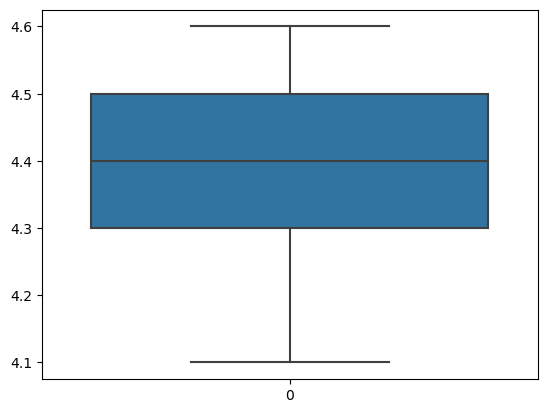

In [70]:
#boxplot
sns.boxplot(df['ProductReviews'])

Based on the boxplot of product reviews, with the x-axis representing the count value and the y-axis representing 
the product reviews. The boxplot shows that the majority of the product reviews are in the range between 4.3 and 4.5. The median value of the product 
reviews is 4.4, which indicates that the product has a high demand in the market.

(array([ 66., 132.,  88.,   0.,  22.,  88.,   0.,  66.,  44.,  22.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

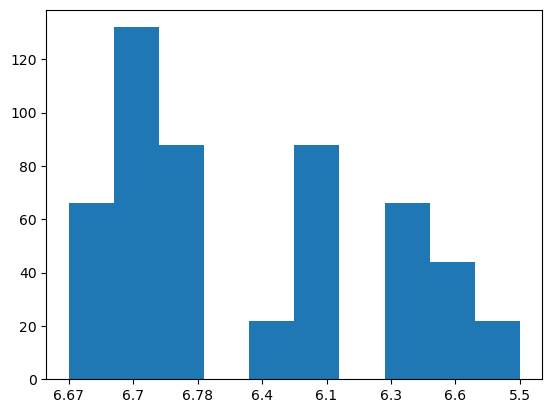

In [118]:
#histogram/distribution plot
plt.hist(df.Displayinch)
## from the histogram the graph represents

from the graph the x-axis represents the size of the dispaly in inches and the y-axis represents the count.from that we can conclude that the max size
of the display is 6.7 and the min size of the display is 5.5,here what we can understand is  the max usage mobile contains the dispaly size is 6.7

In [11]:
plt.savefig('Display.jpeg')

<Figure size 640x480 with 0 Axes>

<Axes: >

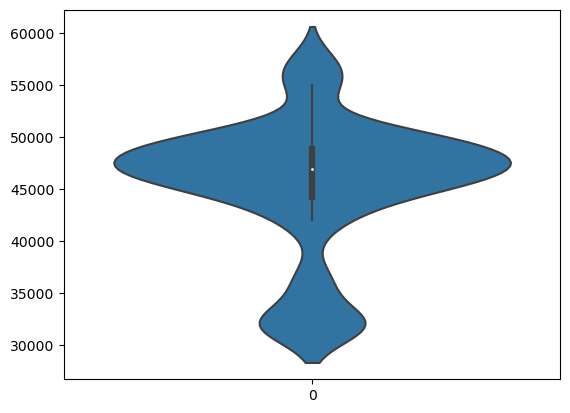

In [120]:
#violin plot
sns.violinplot(df['ProductPrices'])

from the above plot the x-axis represents the count and the y-axis represents the prices of the products here the prices are starting from 30k to 60k 
but many are showing intrest to buy the price lies in between 40k to 55k but the median value for the prpoduct price is 46k.many people much showing 
intrest to buy mobile with their desired features in a budget so here we can understand the mobile we get with all features in the budget of 46k

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='count', ylabel='MobileColour'>

Text(0.5, 1.0, 'mostly used')

TypeError: 'str' object is not callable

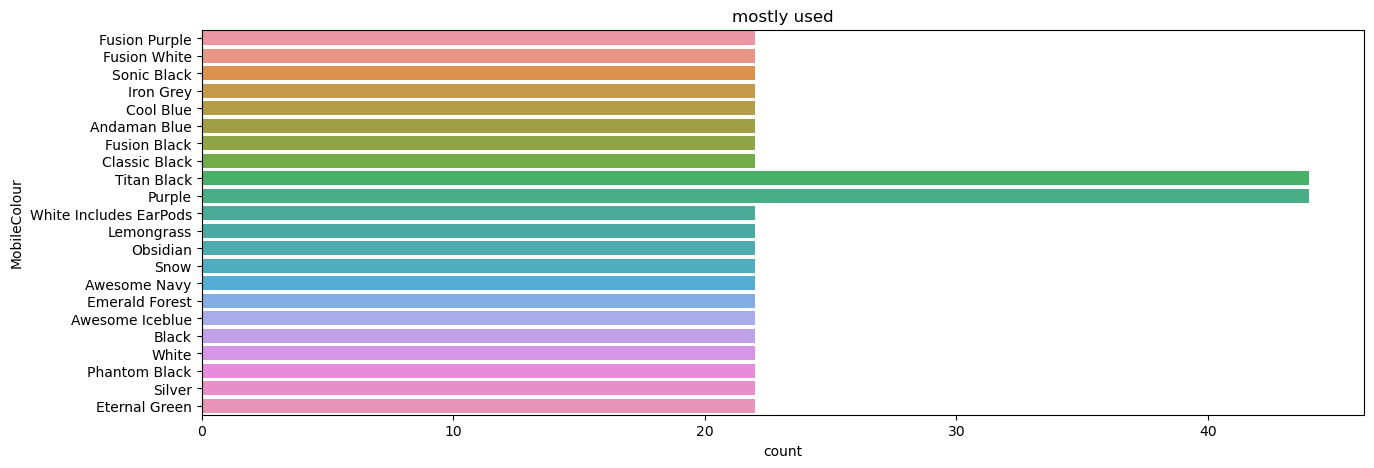

In [263]:
# count plot
plt.figure(figsize=(15,5))
sns.countplot(y='MobileColour',data=df)
plt.title('mostly used')
plt.xlabel('count')
plt.ylabel('MobileColour')
plt.yticks(rotation=90)
plt.show()

from the countplot the graphs shows that the y-axis represents the mobile colour and the x-axis represents the counts here the colour of the mobiles 
are in different colour but the maximum prefred colours are titan black and purple so people are mostly attracted to these two colours

In [121]:
df.Camera.value_counts()

50             88
12 12 12       88
200 8 2 16     66
50 12 8        66
50 50 50 50    44
50 12 5 32     44
50 16          44
50 12 10       22
48             22
12 12 10       22
8 2            22
Name: Camera, dtype: int64

<Axes: >

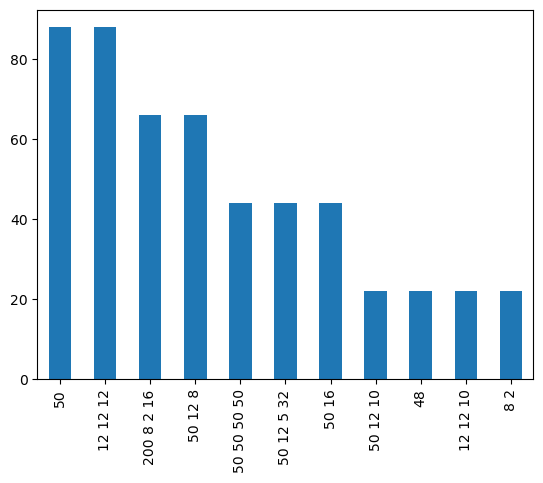

In [122]:
#bar plot
df.Camera.value_counts().plot.bar()

the bar graph explains about the camera the x-axis represents the mp of camera and the y-axis represents the count. here two mp get the same counts 
so here what we observe is two mobiles have the same demand in the market so we need to focus into those brands.

<Axes: ylabel='Camera'>

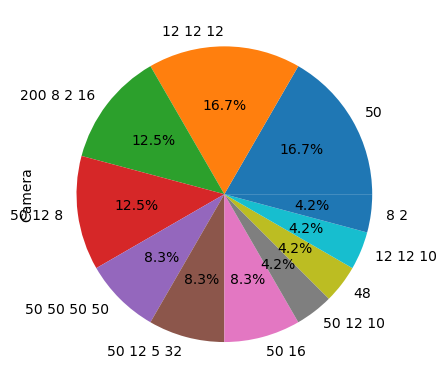

In [126]:
#pie chart
df.Camera.value_counts().plot.pie(autopct='%.1f%%')

here the pie chart represents the percentage of the counts that are appear in the bar graph

# Bivariate Analysis

In [47]:
df.groupby(by=['MobileColour','BrandName'])['ProductPrices'].agg(['mean'])

,,mean
MobileColour,BrandName,
Awesome Iceblue,SAMSUNG,45999.0
Awesome Navy,SAMSUNG,45999.0
Black,Apple,48900.0
Cool Blue,OnePlus,44080.0
Emerald Forest,OnePlus,41999.0
Eternal Green,OnePlus,56999.0
Fusion Black,REDMI,31999.0
Fusion Purple,REDMI,31999.0
Fusion White,REDMI,31999.0


In [48]:
df.pivot_table(values='ProductPrices',index='MobileColour',aggfunc='mean')

,ProductPrices
MobileColour,
Andaman Blue,46999.0
Awesome Iceblue,45999.0
Awesome Navy,45999.0
Black,48900.0
Classic Black,46999.0
Cool Blue,44080.0
Emerald Forest,41999.0
Eternal Green,56999.0
Fusion Black,31999.0


In [49]:
pd.crosstab(df['MobileColour'],df['BrandName'])

BrandName,Apple,Google,OnePlus,REDMI,SAMSUNG
MobileColour,,,,,
Awesome Iceblue,0,0,0,0,22
Awesome Navy,0,0,0,0,22
Black,22,0,0,0,0
Cool Blue,0,0,22,0,0
Emerald Forest,0,0,22,0,0
Eternal Green,0,0,22,0,0
Fusion Black,0,0,0,22,0
Fusion Purple,0,0,0,22,0
Fusion White,0,0,0,22,0


In [50]:
# continous and categorical column
df.groupby(by=['ROM'])['ProductReviews'].agg(['mean'])

,mean
ROM,
128 GB ROM,4.3750
256 GB ROM,4.3875
512 GB ROM,4.4000
64 GB ROM,4.5500


In [51]:
pd.crosstab(df['BrandName'],df['ROM'])

ROM,128 GB ROM,256 GB ROM,64 GB ROM
BrandName,,,
Apple,66,0,44
Google,66,0,0
OnePlus,88,66,0
REDMI,0,66,0
SAMSUNG,44,44,0


In [244]:
df.head(2)

,ProductPrices,ProductReviews,RAM,ROM,MobileColour,BrandName,Displayinch,Camera
0,31999.0,4.2,8.0,256.0,Fusion Purple,REDMI,6.67,200 8 2 16
1,31999.0,4.2,8.0,256.0,Fusion White,REDMI,6.67,200 8 2 16


In [53]:
df.groupby(by=['RAM'])['ProductReviews'].agg(['mean'])

,mean
RAM,
12 GB RAM,4.450
16 GB RAM,4.500
8 GB RAM,4.275


continous to continous variable

In [67]:
df[['ProductPrices','ProductReviews']].corr()

,ProductPrices,ProductReviews
ProductPrices,1.000000,0.339141
ProductReviews,0.339141,1.000000


categorical to categorical variables

In [91]:
pd.crosstab(df['BrandName'],df['MobileColour'])

MobileColour,Awesome Iceblue,Awesome Navy,Black,Cool Blue,Emerald Forest,Eternal Green,Fusion Black,Fusion Purple,Fusion White,Iron Grey,Lemongrass,Obsidian,Phantom Black,Purple,Silver,Snow,Sonic Black,Titan Black,White,White Includes EarPods
BrandName,,,,,,,,,,,,,,,,,,,,
Apple,0,0,22,0,0,0,0,0,0,0,0,0,0,22,22,0,0,0,22,22
Google,0,0,0,0,0,0,0,0,0,0,22,22,0,0,0,22,0,0,0,0
OnePlus,0,0,0,22,22,22,0,0,0,22,0,0,0,0,0,0,22,44,0,0
REDMI,0,0,0,0,0,0,22,22,22,0,0,0,0,0,0,0,0,0,0,0
SAMSUNG,22,22,0,0,0,0,0,0,0,0,0,0,22,22,0,0,0,0,0,0


In [94]:
crosstab=pd.crosstab(df['BrandName'],df['MobileColour'])

In [95]:
crosstab

MobileColour,Awesome Iceblue,Awesome Navy,Black,Cool Blue,Emerald Forest,Eternal Green,Fusion Black,Fusion Purple,Fusion White,Iron Grey,Lemongrass,Obsidian,Phantom Black,Purple,Silver,Snow,Sonic Black,Titan Black,White,White Includes EarPods
BrandName,,,,,,,,,,,,,,,,,,,,
Apple,0,0,22,0,0,0,0,0,0,0,0,0,0,22,22,0,0,0,22,22
Google,0,0,0,0,0,0,0,0,0,0,22,22,0,0,0,22,0,0,0,0
OnePlus,0,0,0,22,22,22,0,0,0,22,0,0,0,0,0,0,22,44,0,0
REDMI,0,0,0,0,0,0,22,22,22,0,0,0,0,0,0,0,0,0,0,0
SAMSUNG,22,22,0,0,0,0,0,0,0,0,0,0,22,22,0,0,0,0,0,0


# plots we can be drawn based on the data features\columns

<Axes: xlabel='ProductPrices', ylabel='BrandName'>

(array([30000., 35000., 40000., 45000., 50000., 55000., 60000.]),
 [Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000'),
  Text(45000.0, 0, '45000'),
  Text(50000.0, 0, '50000'),
  Text(55000.0, 0, '55000'),
  Text(60000.0, 0, '60000')])

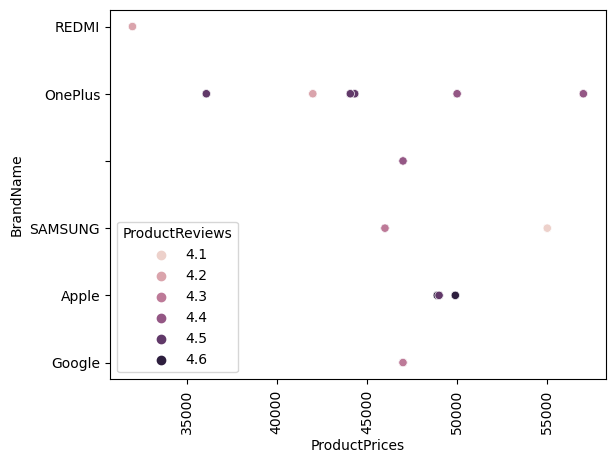

In [133]:
# scatter plot
sns.scatterplot(x=df.ProductPrices,y=df.BrandName,hue=df.ProductReviews)
plt.xticks(rotation=90)
plt.show()

In [7]:
plt.savefig('Brand_Price_Review.png')

<Figure size 640x480 with 0 Axes>

the scatter plot reprsents the two variables i.e,Product prices and brand name x-axis contain product price and the y-axis contain brand name each point 
of the scatter plot represents the combination of the product price and brand name the main thing we observe here is the x and y axis are corresponds 
at one point it shows the product reviews based on that here we can easily identify which brand is available within a budget and contain best reviews 
from this graph Oneplus is friendly budget and it contains 4.5 rating

<Axes: xlabel='ProductPrices', ylabel='Density'>

Text(0.5, 1.0, 'Histogram plot')

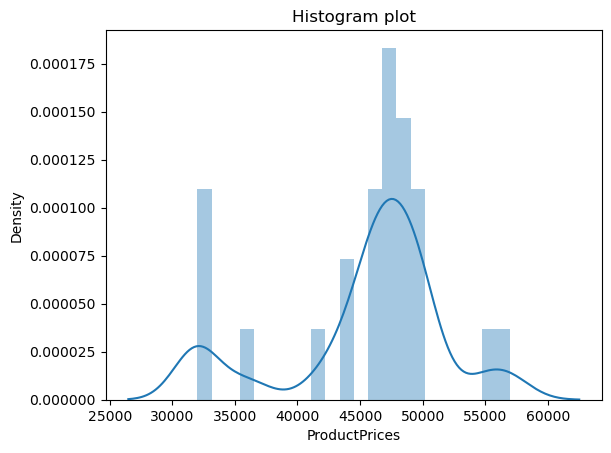

In [57]:
sns.distplot(df.ProductPrices,kde=True)
plt.title('Histogram plot')
plt.show()

from the above plot the x-axis represents the prices of the products and the y-axis rpresents the density here the prices are starting from nearly 27k to 60+k 
but many are showing intrest to buy the price lies in between 45k to 50k but the median value for the prpoduct price is 46k.many people much showing 
intrest to buy mobile with their desired features in a budget so here we can understand the mobile we get with all features in the budget of 46k

<Axes: >

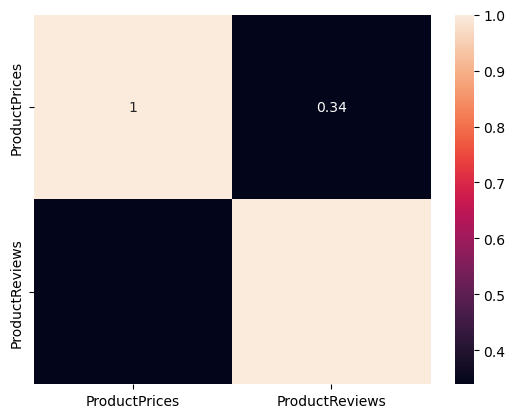

In [58]:
# heat map
sns.heatmap(df[['ProductPrices','ProductReviews']].corr(),annot=True)
plt.show()

heatmap is a graphical representation of data where values are represented as colors.the x-axis represents one variable, and the y-axis 
represents another variable. In the case of a heatmap showing product prices and product reviews, the x-axis might represent different price ranges 
and the y-axis might represent different review scores. The cells in the heatmap would then be colored based on the frequency or density of products 
with a given price range and review score.

conclusion

(array([176.,   0.,   0.,  44.,   0.,   0., 264.,   0.,   0.,  44.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

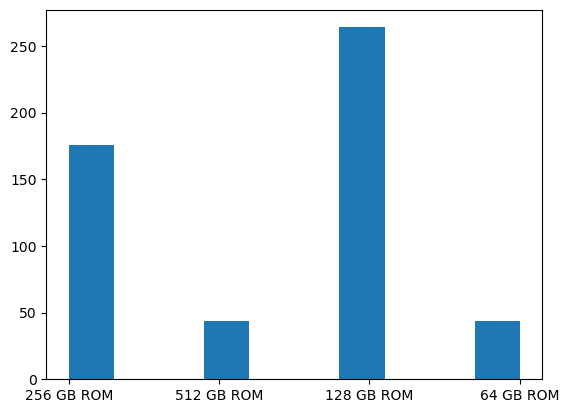

In [59]:
#histogram
plt.hist(df.ROM)

here the histogram plot represents the differnt sizes of ROM it lies on the x-axisand the counts are in teh y-axis here if we observe the graph 
the mostly mobiles containg 128 gb ROM and the less mobiles contain 512 GB ROM the 128 GB ROM are avaible in oneplus brand which is in friendly budget 

Text(0.5, 1.0, 'BrandName vs ProductPrices')

(array([30000., 35000., 40000., 45000., 50000., 55000., 60000.]),
 [Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000'),
  Text(45000.0, 0, '45000'),
  Text(50000.0, 0, '50000'),
  Text(55000.0, 0, '55000'),
  Text(60000.0, 0, '60000')])

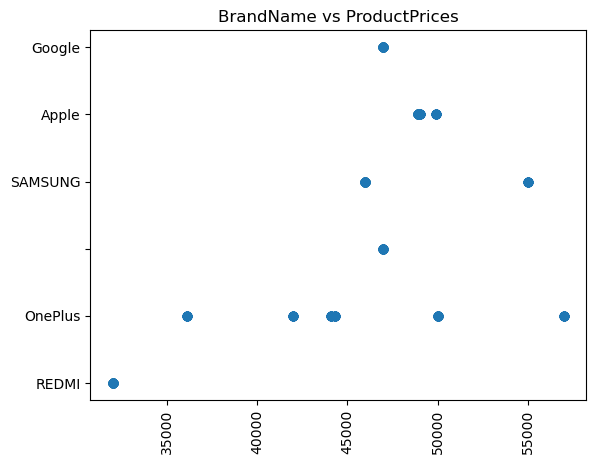

In [142]:
#scatter
plt.scatter(df.ProductPrices,df.BrandName)
plt.title('BrandName vs ProductPrices')
plt.xlabel=('BrandName')
plt.ylabel=('ProductPrices')
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.savefig('Brand_Price.png')

the scatter plot represents the relation between the brandname and product prices.brandname lies on the x-axis and the product prices lies on y-axis 
here we can observe the prices are start from the below 35k and above 55k but the only one brand is availble from lowest price to highest for the 
people based on their budget so we have to more focus on the brand i.e,Oneplus 

<Axes: xlabel='BrandName', ylabel='Camera'>

TypeError: 'str' object is not callable

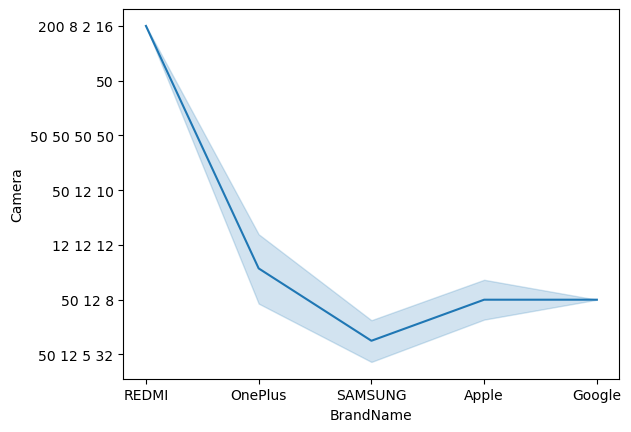

In [251]:
#lineplot
sns.lineplot(y=df.Camera,x=df.BrandName)
plt.ylabel('Camera')
plt.xlabel('BrandName')
plt.xticks(rotation=90)
plt.show()

In [ ]:
the line plot shows the x-axis represents the brandnames and the y-axis represents the mega pixel count the graph represents the camera of each brand 
and the camera mega pixel count foe easily analyse to compare the camera specifications with the other brands 

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='BrandName', ylabel='ProductPrices'>

TypeError: 'str' object is not callable

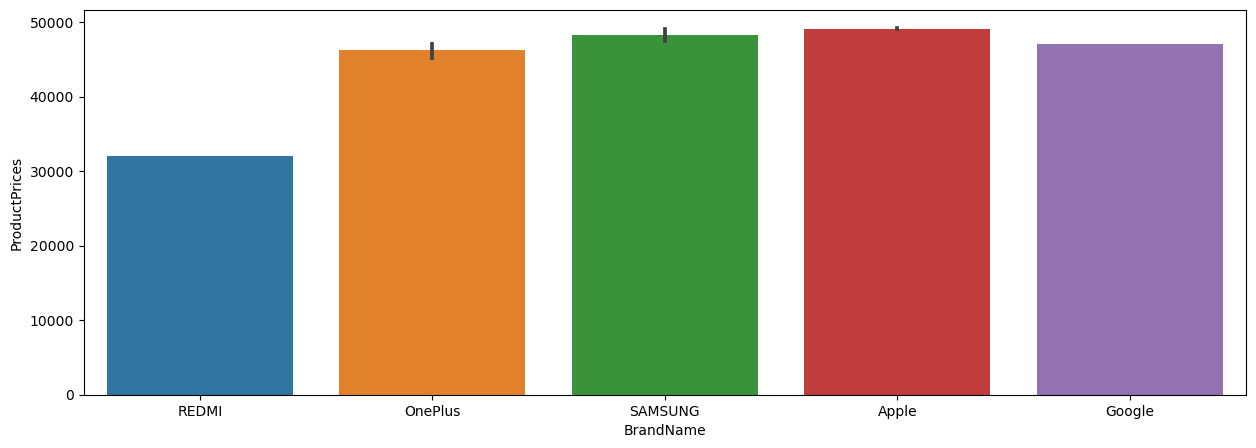

In [252]:
#barplot
plt.figure(figsize=(15,5))
sns.barplot(x=df.BrandName,y=df.ProductPrices)
plt.xlabel('BrandName')
plt.ylabel('ProducPrices)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#the bar graph contain the brandname and product prices  the brand names are listed on the x-axis and the prices are listed on the y-axis it explains 
#apple lies on the highest price and SAMSUNG,Oneplus,Google lies on moderate prices and the REDMI has the lowest price 

# Conclusion

In [ ]:
#Smart phones are Essential tools in our daily life they help us to communicate, socialize and interact with eachother at any point in time.the 
#consumers buying a variety of smartphones which satisfy their wants and they are always influenced by his purchasing activities by some considerations 
#which leads to select a particular brand or a particular operating systems in preferred to others.From this study I collected some data from the 
#website i.e, Flipkart to analyse and compare the data easily based on their features it gives some idea to the consumers easily. Here is the extracted 
#and cleaned data in. Csv format , is useful to do data analysis on mobile phone purchases from the above data i would like to suggest the brand Oneplus
#because from the analysing data i observe Maximum of what the customers want is found in it and also it is avaible in within budget.